<a href="https://colab.research.google.com/github/chriscc447/orie3120_final/blob/main/differences_in_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sn

In [52]:
df = pd.read_csv("grouped_songs_dataset.csv")
df=df.dropna()
df=df.drop(columns=['uri','rank_mean','lowest_rank','rank_median','highest_rank','uri_count','streams_mean','streams_min','streams_median','streams_sum','first_date','last_date'])
df['topten']=0.0
df['botten']=0.0

In [53]:
topten = df.sort_values(by=['streams_max'],ascending=False)
df.loc[df['streams_max']>=4233070.0 ,'topten']= 1.0
df[df['topten']==1]

,artist,title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,streams_max,topten,botten
1638,Drake,God's Plan,0.754,0.449,7.0,-9.211,1.0,0.109,0.03320,0.000083,0.5520,0.3570,77.169,198973.0,4.0,4739798.0,1.0,0.0
1760,XXXTENTACION,SAD!,0.740,0.613,8.0,-4.880,1.0,0.145,0.25800,0.003720,0.1230,0.4730,75.023,166606.0,4.0,4437612.0,1.0,0.0
1920,J. Cole,KOD,0.831,0.782,0.0,-6.274,1.0,0.150,0.21000,0.000000,0.1130,0.1990,141.869,191437.0,4.0,4233070.0,1.0,0.0
2219,Drake,Nonstop,0.912,0.412,7.0,-8.074,1.0,0.124,0.01640,0.013000,0.1040,0.4220,154.983,238614.0,4.0,5749019.0,1.0,0.0
2220,Drake,Survival,0.607,0.596,9.0,-9.090,0.0,0.358,0.13300,0.000000,0.1230,0.1490,77.324,136187.0,4.0,5219711.0,1.0,0.0
2221,Drake,Emotionless,0.413,0.677,1.0,-5.120,1.0,0.255,0.02490,0.000000,0.0793,0.0845,172.501,302173.0,4.0,4842941.0,1.0,0.0
2222,Drake,Elevate,0.758,0.474,1.0,-8.720,1.0,0.146,0.01500,0.000000,0.1160,0.0541,76.062,184960.0,4.0,4686139.0,1.0,0.0
2230,Drake,In My Feelings,0.835,0.626,1.0,-5.833,1.0,0.125,0.05890,0.000060,0.3960,0.3500,91.030,217925.0,4.0,4805299.0,1.0,0.0
2341,Travis Scott,STARGAZING,0.487,0.789,8.0,-3.690,1.0,0.044,0.00947,0.000004,0.1890,0.0564,150.007,270715.0,4.0,4244308.0,1.0,0.0
2598,Lil Wayne,Mona Lisa (feat. Kendrick Lamar),0.855,0.694,2.0,-4.393,1.0,0.169,0.37100,0.000000,0.1090,0.4900,122.078,324189.0,4.0,4444027.0,1.0,0.0


In [54]:
botten = df.sort_values(by=['streams_max'],ascending=True)
df.loc[df['streams_max']<=144431.0 ,'botten']= 1.0
df[df['botten']==1]


,artist,title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,streams_max,topten,botten
191,Big Sean,I Don't Fuck With You,0.824,0.733,1.0,-5.475,1.0,0.0613,0.0355,0.000000,0.3240,0.393,97.971,284387.0,4.0,143847.0,0.0,1.0
192,Phil Collins,You Can't Hurry Love - 2016 Remaster,0.619,0.934,7.0,-4.604,1.0,0.0336,0.0253,0.000000,0.1020,0.792,97.502,174080.0,4.0,143813.0,0.0,1.0
193,DJ Khaled,For Free (feat. Drake),0.916,0.571,10.0,-8.241,0.0,0.2000,0.0173,0.000001,0.1530,0.498,103.521,183695.0,4.0,143765.0,0.0,1.0
229,Rae Sremmurd,Look Alive,0.786,0.583,0.0,-7.415,1.0,0.0393,0.0552,0.000002,0.3260,0.229,120.024,228000.0,4.0,144431.0,0.0,1.0
230,The Weeknd,Ordinary Life,0.537,0.587,7.0,-7.486,0.0,0.0771,0.0275,0.000000,0.0961,0.365,149.748,221920.0,4.0,141837.0,0.0,1.0
235,MØ,Final Song,0.695,0.672,1.0,-6.109,0.0,0.0345,0.0140,0.000084,0.0756,0.245,104.988,235827.0,4.0,139227.0,0.0,1.0
254,Ed Sheeran,Don't,0.506,0.911,0.0,-4.779,1.0,0.2300,0.4800,0.000000,0.6960,0.781,105.475,590333.0,4.0,134420.0,0.0,1.0
255,Lil Uzi Vert,Seven Million (feat. Future),0.886,0.629,1.0,-4.404,0.0,0.3060,0.0510,0.000008,0.1210,0.487,158.002,182491.0,4.0,133605.0,0.0,1.0
256,Ed Sheeran,Give Me Love,0.526,0.328,1.0,-9.864,1.0,0.0461,0.6940,0.000000,0.1120,0.110,116.068,526387.0,4.0,133040.0,0.0,1.0
276,Kanye West,Champions,0.692,0.774,6.0,-2.480,0.0,0.0876,0.0623,0.000000,0.8730,0.349,134.952,334253.0,4.0,141632.0,0.0,1.0


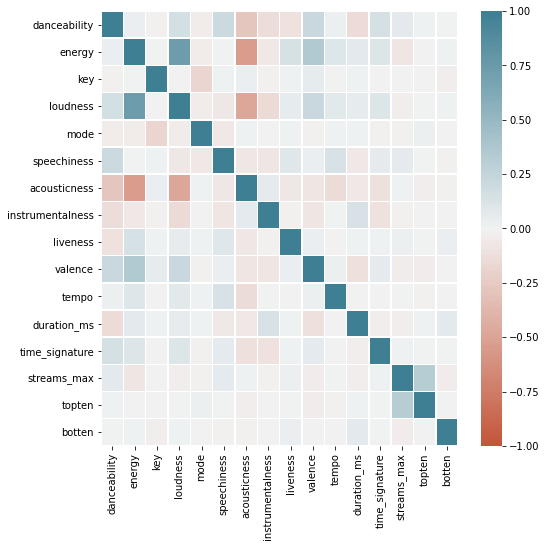

In [55]:
#show correlation between ind vars
df_corr = df.copy()
df_corr = df.corr()
df_corr

plt.figure(figsize=(8,8))
sn.heatmap(df_corr, cmap = sn.diverging_palette(20, 220, n = 200), vmin = -1, vmax = 1, linewidths = 0.5) # annot = True
plt.show()


In [60]:
#getting LinAlgError: Singular matrix when instrumental is included but corr looks good 
#will leave out for now
X = df[['danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature']]

In [61]:
model2= sm.Logit(df['topten'],sm.add_constant(X))

In [62]:
model2.fit().summary().as_text()

Optimization terminated successfully.
         Current function value: 0.012688
         Iterations 12


'                           Logit Regression Results                           \n==============================================================================\nDep. Variable:                 topten   No. Observations:                 4899\nModel:                          Logit   Df Residuals:                     4886\nMethod:                           MLE   Df Model:                           12\nDate:                Fri, 21 May 2021   Pseudo R-squ.:                  0.1358\nTime:                        18:47:24   Log-Likelihood:                -62.160\nconverged:                       True   LL-Null:                       -71.932\nCovariance Type:            nonrobust   LLR p-value:                   0.07624\n==================================================================================\n                     coef    std err          z      P>|z|      [0.025      0.975]\n----------------------------------------------------------------------------------\nconst             -8.5411  

In [65]:
model3= sm.Logit(df['botten'],sm.add_constant(X)).fit()
model3.summary().as_text()

Optimization terminated successfully.
         Current function value: 0.012143
         Iterations 12


'                           Logit Regression Results                           \n==============================================================================\nDep. Variable:                 botten   No. Observations:                 4899\nModel:                          Logit   Df Residuals:                     4886\nMethod:                           MLE   Df Model:                           12\nDate:                Fri, 21 May 2021   Pseudo R-squ.:                  0.1730\nTime:                        18:47:41   Log-Likelihood:                -59.488\nconverged:                       True   LL-Null:                       -71.932\nCovariance Type:            nonrobust   LLR p-value:                   0.01537\n==================================================================================\n                     coef    std err          z      P>|z|      [0.025      0.975]\n----------------------------------------------------------------------------------\nconst            -11.3564  